# The Travelling Salesman Problem Genetic Algorithm

# Imports

In [0]:
from numpy import array, linspace, pi, sqrt, repeat
from random import random, uniform, sample
from pandas import DataFrame
from operator import itemgetter
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')


# Create node data

initial conditions

In [0]:
nodes = 50
node_list = []

function to create x,y node data

In [0]:
def create_node(x, y):
	return x, y

create a list of random nodes

In [0]:
for i in range(nodes):
	node_list.append(create_node(x = random()*10, y = random()*10))

# Algorithm Implementation

define the linear distance between two nodes

In [0]:
def linear_distance(from_node, to_node):
	x_distance = abs(from_node[0] - to_node[0])
	y_distance = abs(from_node[1] - to_node[1])
	distance = sqrt((x_distance)**2 + (y_distance)**2)
	return distance

define the route distance as the sum of the linear distances: dist(node[0] to node[1]) + dist(node[1] to node[2]) + ...... + dist(node[-1] to node[0])

In [0]:
def route_distance(node_list):
	distance = 0
	if distance == 0:
		path_distance = 0
		for i in range(len(node_list)):
			from_node = node_list[i]
			to_node = None
			if i + 1 < len(node_list):
				to_node = node_list[i + 1]
			else:
				to_node = node_list[0]
			path_distance += linear_distance(from_node, to_node)
		distance = path_distance
	return distance

define route fitness (fitness = 1 / route_distance) --> the smaller the route_distance, the higher the fitness

In [0]:
def route_fitness(node_list):
	fitness = 0.0
	if fitness == 0:
		fitness = 1 / float(route_distance(node_list))
	return fitness

create a randomized route of nodes sampled from the node_list:

In [0]:
def create_route(node_list):
	route = sample(node_list, len(node_list))
	return route


create an initial population (first generation of chromosones) of random routes

In [0]:
def initial_population(population_size, node_list):
	population = []
	for i in range(population_size):
		population.append(create_route(node_list))
	return population

determine the fitness for each route in the population, then rank them

In [0]:
def rank_routes(population):
	fitness_results = {}
	for i in range(len(population)):
		fitness_results[i] = route_fitness(population[i])
	return sorted(fitness_results.items(), key = itemgetter(1), reverse = True)

create the selection method for being chromosones to the mating pool

In [0]:
def selection(rank, elite_size):
	selection_results = []
	df = DataFrame(array(rank), columns = ['Index', 'Fitness'])
	df['Cum_Sum'] = df.Fitness.cumsum()
	df['Cum_Percent'] = (df.Cum_Sum / df.Fitness.sum())*100
	for i in range(elite_size):
		selection_results.append(rank[i][0])
	for i in range(len(rank) - elite_size):
		pick = random()*100
		for i in range(len(rank)):
			if pick <= df.iat[i, 3]:
				selection_results.append(rank[i][0])
				break
	return selection_results

extract the selected chromosones into a mating pool

In [0]:
def mating_pool(population, selection_results):
	mating_pool = []
	for i in range(len(selection_results)):
		index = selection_results[i]
		mating_pool.append(population[index])
	return mating_pool

create a child through crossover breeding

In [0]:
def breed(mom, dad):
	child = []
	child_mom = []
	child_dad = []
	gene_mom = int(random()*len(mom))
	gene_dad = int(random()*len(dad))
	start_gene = min(gene_mom, gene_dad)
	end_gene = max(gene_mom, gene_dad)
	for i in range(start_gene, end_gene):
		child_mom.append(mom[i])
	child_dad = [i for i in dad if i not in child_mom]
	child = child_mom + child_dad
	return child


breed the entire population

In [0]:
def breed_population(mating_pool, elite_size):
	children = []
	length = len(mating_pool) - elite_size
	pool = sample(mating_pool, len(mating_pool))
	for i in range(elite_size):
		children.append(mating_pool[i])
	for i in range(length):
		child = breed(pool[i], pool[len(mating_pool) - i - 1])
		children.append(child)
	return children

create a mutation using swapping --> two cities potentially swap places

In [0]:
def mutate(individual, mutation_rate):
	for swapped in range(len(individual)):
		if random() < mutation_rate:
			swap_with = int(random()*len(individual))
			node1 = individual[swapped]
			node2 = individual[swap_with]
			individual[swapped] = node2
			individual[swap_with] = node1
	return individual

mutate the entire population of chromosones

In [0]:
def mutate_population(population, mutation_rate):
	mutated_population = []
	for i in range(len(population)):
		mutated_index = mutate(population[i], mutation_rate)
		mutated_population.append(mutated_index)
	return mutated_population

produce a new generation of chromosones based on breeding the population with potential mutations

In [0]:
def next_generation(current_generation, elite_size, mutation_rate):
	rank = rank_routes(current_generation)
	selection_results = selection(rank, elite_size)
	matingpool = mating_pool(current_generation, selection_results)
	children = breed_population(matingpool, elite_size)
	next_generation = mutate_population(children, mutation_rate)
	return next_generation


create a main function that calls the genetic algorithm

In [0]:
def genetic_algorithm(population, population_size, elite_size, mutation_rate, generations):
	population = initial_population(population_size, population)
	print('Initial route distance:', str(1 / rank_routes(population)[0][1]))
	for i in range(generations):
		population = next_generation(population, elite_size, mutation_rate)
	print('Final route distance:', str(1 / rank_routes(population)[0][1]))
	best_route_index = rank_routes(population)[0][0]
	best_route = population[best_route_index]
	return best_route

# Solve and visualize the solution

visualize each node

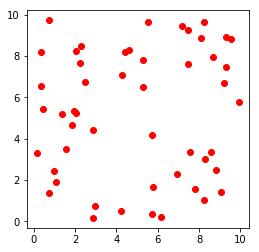

In [0]:
for i in range(nodes):
	plt.plot(node_list[i][0], node_list[i][1], 'ro')
	plt.gca().set_aspect('equal')

In [0]:
best_route = genetic_algorithm(population = node_list, population_size = 150, elite_size = 20, mutation_rate = 0.01, generations = 500)

Initial route distance: 235.1561716806459
Final route distance: 118.66710560230295


visualize the path

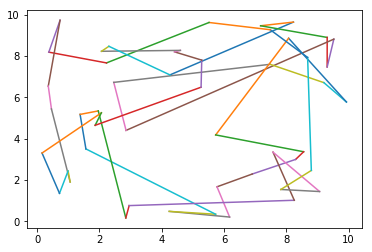

In [0]:
i = 0
j = 1
while j < len(node_list):
	plt.plot([best_route[i][0], best_route[j][0]], [best_route[i][1], best_route[j][1]], '-')
	i += 1
	j += 1
plt.plot([best_route[-1][0], best_route[0][0]], [best_route[-1][1], best_route[0][1]], '-')

show the plot

In [0]:
plt.show()